# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
import statsmodels.api as sm
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Zambalayev, Timur]

### Part (b): Course Number

[CSCI E-109a]

### Part (c): Who did you work with?

[]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

**Solution:**

In [2]:
# Functions for fitting and evaluating multiple linear regression

# --------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input:
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return:
#      w (d x 1 array of coefficients)
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    # Append a column of one's to x
    n = len(x_train)
    ones_col = np.ones((n, 1))
    x_train = np.concatenate((x_train, ones_col), axis=1)

    # Compute transpose of x
    x_transpose = x_train.T

    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible
    x_t_x_inv = np.linalg.pinv(x_transpose.dot(x_train))

    # Compute w: inter_term * x^T * y
    w = x_t_x_inv.dot(x_transpose).dot(y_train)

    # Obtain intercept: 'c' (last index)
    c = w[-1]

    return w[:-1], c


# --------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE
# of the linear regression model on a data set
# Input:
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return:
#      r_squared (float)
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):
    # Compute predicted labels
    y_pred = x_test.dot(w) + c

    # Evaluate squared error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.square(y_test - y_pred).sum()

    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = y_test.mean()
    y_variance = np.square(y_test - y_mean).sum()

    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred


def loadtxt(file_name):
    return np.loadtxt('datasets/%s' % file_name, delimiter=',', skiprows=1)


def split_y_x(data):
    y = data[:, -1]
    x = data[:, :-1]
    return y, x


def evaluate_model_prob_1a():
    # Load train and test data sets
    data_train = loadtxt('dataset_1_train.txt')
    data_test = loadtxt('dataset_1_test.txt')

    # Split predictors from response
    # Training
    y_train, x_train = split_y_x(data_train)

    # Testing
    y_test, x_test = split_y_x(data_test)

    # Fit multiple linear regression model
    w, c = multiple_linear_regression_fit(x_train, y_train)

    # Evaluate model
    r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

    print 'R^2 score on test set: %.3f' % r_squared

    
evaluate_model_prob_1a()

R^2 score on test set: 0.178


### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

**Solution:**

Linear regression with all predictors


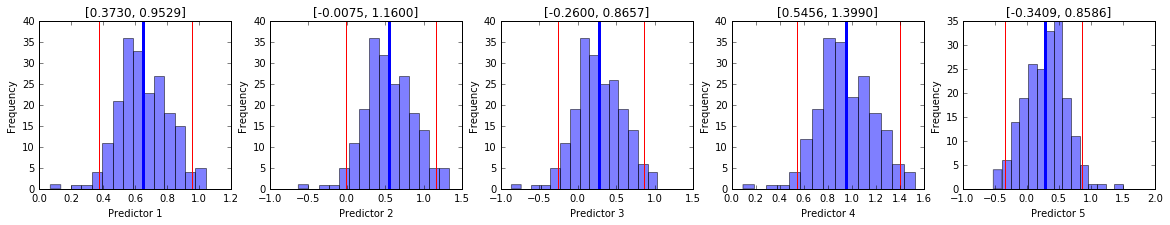

In [3]:
from collections import namedtuple


DatasetData = namedtuple('DatasetData', ['x', 'y'])


def read_dataset_data(filename):
    # Load train set
    data = loadtxt(filename)

    y, x = split_y_x(data)

    return DatasetData(x, y)


def plot_histograms_prob_1b(dataset_2_data):
    np.random.seed(1090)

    x, y = dataset_2_data

    # Record size of the data set
    n, d = x.shape
    subsample_size = 100

    # No. of subsamples
    num_samples = 200

    # Linear regression with all 5 predictors

    # Create a n x d array to store coefficients for 100 subsamples
    coefs_multiple = np.zeros((num_samples, d))

    print 'Linear regression with all predictors'

    # Repeat for 200 subsamples
    for i in range(num_samples):
        # Generate a random subsample of <subsample_size> data points
        random_indices = np.random.choice(n, subsample_size)
        x_subsample = x[random_indices, :]
        y_subsample = y[random_indices]

        # Fit linear regression model on subsample
        w, c = multiple_linear_regression_fit(x_subsample, y_subsample)

        # Store the coefficient for the model we obtain
        coefs_multiple[i, :] = w

    # Plot histogram of coefficients, and report their confidence intervals
    fig, axes = plt.subplots(1, d, figsize=(20, 3))

    # Repeat for each coefficient
    for j in range(d):
        # Compute mean for the j-th coefficient from subsamples
        coef_j_mean = coefs_multiple[:, j].mean()

        # Compute confidence interval at 95% confidence level
        conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
        conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)

        # Plot histogram of coefficient values
        ax = axes[j]
        ax.hist(coefs_multiple[:, j], 15, alpha=0.5)

        # Plot vertical lines at mean and left, right extremes of confidence interval
        ax.axvline(x=coef_j_mean, linewidth=3)
        ax.axvline(x=conf_int_left, linewidth=1, c='r')
        ax.axvline(x=conf_int_right, linewidth=1, c='r')

        # Set plot labels
        ax.set_title('[%.4f, %.4f]' % (conf_int_left, conf_int_right))
        ax.set_xlabel('Predictor %d' % (j + 1))
        ax.set_ylabel('Frequency')

    plt.show()


dataset_2_data = read_dataset_data("dataset_2.txt")
plot_histograms_prob_1b(dataset_2_data)

***How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?***

We don't have the context for the predictors, so absolute values of the spread of the coefficient values and confidence intervals don't tell us much. 
The distributions looks normal and centered around their means.
We can say that Predictor 2, 3 and 5 are not significant here since the confidence intervals for their coefficients include zero.

In [5]:
def compute_confidence_intervals_prob_1b(dataset_2_data):
    x, y = dataset_2_data
    d = x.shape[1]

    # Add column of ones to x matrix
    x = sm.add_constant(x)

    # Create model for linear regression
    model = sm.OLS(y, x)
    # Fit model
    fitted_model = model.fit()
    # The confidence intervals for our five coefficients are contained in the last five
    # rows of the fitted_model.conf_int() array
    conf_int = fitted_model.conf_int()[1:, :]

    for j in range(d):
        print 'the confidence interval for coefficient %d: [%.4f, %.4f]' % (j + 1, conf_int[j][0], conf_int[j][1])

        
compute_confidence_intervals_prob_1b(dataset_2_data)

the confidence interval for coefficient 1: [0.5528, 0.7504]
the confidence interval for coefficient 2: [0.3522, 0.7497]
the confidence interval for coefficient 3: [0.0889, 0.4734]
the confidence interval for coefficient 4: [0.8098, 1.0985]
the confidence interval for coefficient 5: [0.0785, 0.4884]


***Compare confidence intervals you find through simulation to the ones given by the formula (or statmodels), are your results what you would expect?***

The confidence intervals calculated for the whole dataset (n = 1000) are much narrower than the confidence intervals recieved through simulation (n = 200). We could have expected that because the sample size is larger => the standard error would be smaller => narrower confidence intervals for the coefficients.

We must notice that all coefficient are significant now.

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

**Solution:**

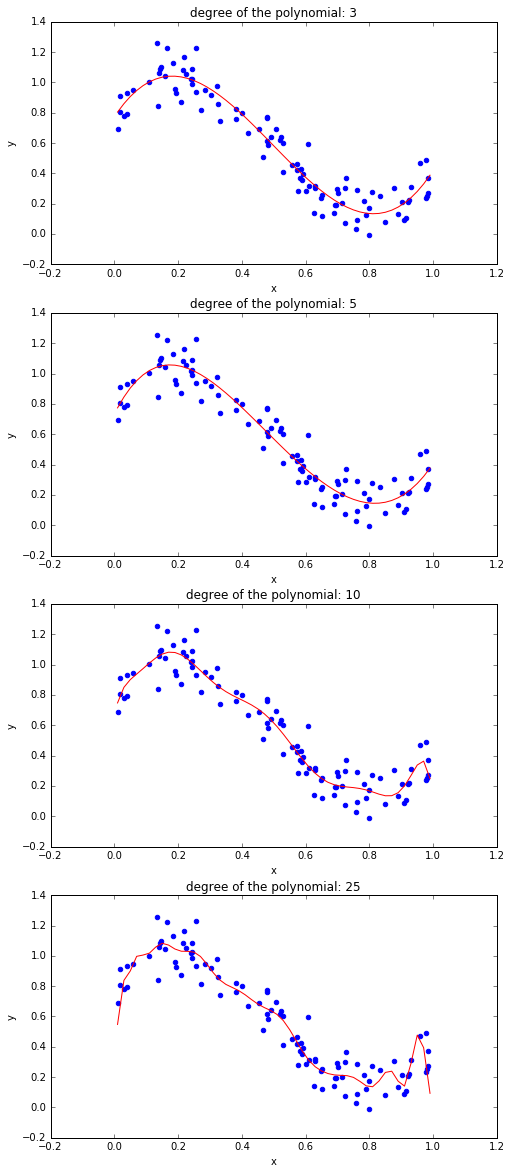

In [7]:
from itertools import izip


# polynomial regression fit

def polynomial_regression_fit(x_train, y_train, degree_of_the_polynomial):
    x_column = np.vstack(x_train)
    poly_x = x_column
    for exponent in range(2, degree_of_the_polynomial + 1):
        new_column = np.power(x_column, exponent)
        poly_x = np.hstack((poly_x, new_column))

    linear_regression = Lin_Reg()
    linear_regression.fit(poly_x, y_train)

    return linear_regression.coef_, linear_regression.intercept_


# polynomial regression predict

def calculate_polynomial_value(coefs, intercept, x):
    return intercept + sum(coef * pow(x, i + 1) for i, coef in enumerate(coefs))


def polynomial_regression_predict(coefs, intercept, degree_of_the_polynomial, x_test):
    return [calculate_polynomial_value(coefs, intercept, x) for x in x_test]


# polynomial regression score

def polynomial_regression_score(y_predicted, y_test):
    rss = 0.0
    tss = 0.0
    y_mean = np.mean(y_test)
    for predicted_value, actual_value in izip(y_predicted, y_test):
        rss += (actual_value - predicted_value) ** 2
        tss += (actual_value - y_mean) ** 2

    r_squared = 1.0 - rss / tss
    return r_squared, rss


def read_dataset3_data():
    data = loadtxt('dataset_3.txt')

    y = data[:, -1]
    x = data[:, 0]

    return DatasetData(x, y)


def fit_and_visualize_prob_2a(dataset_3_data):
    x, y = dataset_3_data

    degrees = [3, 5, 10, 25]

    degrees_len = len(degrees)
    _, axes = plt.subplots(degrees_len, 1, figsize=(8, 5 * degrees_len))

    xs = np.linspace(0.01, 0.99)
    for degree, ax in izip(degrees, axes):
        coefs, intercept = polynomial_regression_fit(x, y, degree)
        ax.scatter(x, y, color='blue')

        ax.plot(xs, polynomial_regression_predict(coefs, intercept, degree, xs), color='red')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('degree of the polynomial: %d' % degree)

    plt.show()

    
dataset_3_data = read_dataset3_data()
fit_and_visualize_prob_2a(dataset_3_data)

We can see that the cubic polynomial fits nicely our data. The 5th degree polynomial looks about the same. As for 10th and 25th degree polynomials it seems that they overfit trying to fit the noise.

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

**Solution:**

degree:  1, train R^2: 0.74681, test R^2: 0.75310
degree:  2, train R^2: 0.75907, test R^2: 0.75252
degree:  3, train R^2: 0.91300, test R^2: 0.92461
degree:  4, train R^2: 0.91833, test R^2: 0.91648
degree:  5, train R^2: 0.91854, test R^2: 0.91675
degree:  6, train R^2: 0.91854, test R^2: 0.91704
degree:  7, train R^2: 0.91870, test R^2: 0.91686
degree:  8, train R^2: 0.92171, test R^2: 0.91637
degree:  9, train R^2: 0.92210, test R^2: 0.91257
degree: 10, train R^2: 0.93079, test R^2: 0.91324
degree: 11, train R^2: 0.93164, test R^2: 0.90665
degree: 12, train R^2: 0.93530, test R^2: 0.89268
degree: 13, train R^2: 0.93570, test R^2: 0.89390
degree: 14, train R^2: 0.93601, test R^2: 0.89036
degree: 15, train R^2: 0.93679, test R^2: 0.88430
max test R^2, degree: 3, value: 0.92461


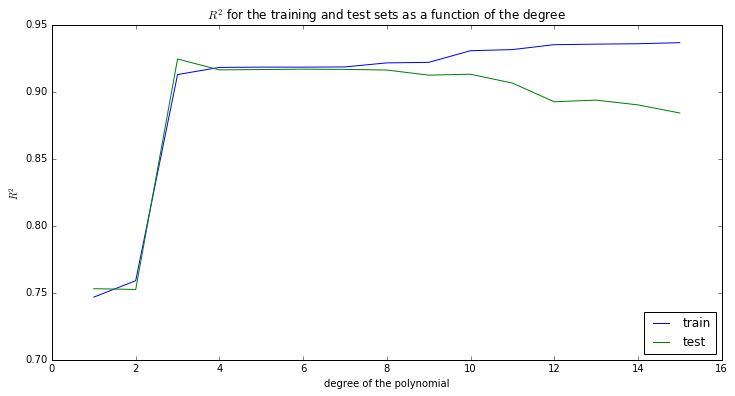

In [8]:
def evaluate_polynomial_regression_fit(coefs, intercept, x_test, y_test, degree):
    y_predicted = polynomial_regression_predict(coefs, intercept, degree, x_test)
    return polynomial_regression_score(y_predicted, y_test)


def train_test_split_by_index(data, index):
    train = data[:index]
    test = data[index:]
    return train, test


def plot_r_sq(ax, x_train, x_test, y_train, y_test, max_degree=15):
    r_sq_train_list = []
    r_sq_test_list = []

    degrees = range(1, max_degree + 1)
    for degree in degrees:
        coefs, intercept = polynomial_regression_fit(x_train, y_train, degree)
        r_sq_train, _ = evaluate_polynomial_regression_fit(coefs, intercept, x_train, y_train, degree)
        r_sq_test, _ = evaluate_polynomial_regression_fit(coefs, intercept, x_test, y_test, degree)
        print 'degree: %2d, train R^2: %.5f, test R^2: %.5f' % (degree, r_sq_train, r_sq_test)

        r_sq_train_list.append(r_sq_train)
        r_sq_test_list.append(r_sq_test)

    max_r_sq_test = np.max(r_sq_test_list)
    max_r_sq_test_degree = r_sq_test_list.index(max_r_sq_test) + 1
    print 'max test R^2, degree: %d, value: %.5f' % (max_r_sq_test_degree, max_r_sq_test)

    ax.plot(degrees, r_sq_train_list, label='train')
    ax.plot(degrees, r_sq_test_list, label='test')
    ax.legend(loc='lower right')
    ax.set_xlabel('degree of the polynomial')
    ax.set_ylabel('$R^2$')
    ax.set_title('$R^2$ for the training and test sets as a function of the degree')


def compare_errors_prob_2b(dataset_3_data):
    x, y = dataset_3_data
    mid_index = len(x) // 2

    x_train, x_test = train_test_split_by_index(x, mid_index)
    y_train, y_test = train_test_split_by_index(y, mid_index)

    _, ax = plt.subplots(1, 1, figsize=(12, 6))

    plot_r_sq(ax, x_train, x_test, y_train, y_test)

    plt.show()

    
compare_errors_prob_2b(dataset_3_data)

***Describe the relationship between degree of the polynomial model and the fit on both the training and testing data***

Both the train and test R^2 jump when we go from quadratic (degree = 2) to cubic (degree = 3). Then train R^2 slowly increases further since it tries to fit the data closer and closer. The test R^2 slowly goes down (degree 3 and larger) due to overfitting (higher variance).

***Explain, based on the plot, what is the best polynomial model for the data***

For this we need to look at the best value for test R^2. It's for degree = 3 (test R^2 = 0.9246). The cubic polynomial is the best model for the data.

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

**Solution:**

degree:  1, AIC: -350.0, BIC: -347.4
degree:  2, AIC: -349.7, BIC: -344.5
degree:  3, AIC: -458.3, BIC: -450.4
degree:  4, AIC: -457.3, BIC: -446.9
degree:  5, AIC: -455.5, BIC: -442.5
degree:  6, AIC: -454.8, BIC: -439.2
degree:  7, AIC: -453.0, BIC: -434.8
degree:  8, AIC: -452.5, BIC: -431.7
degree:  9, AIC: -451.2, BIC: -427.8
degree: 10, AIC: -453.5, BIC: -427.5
degree: 11, AIC: -452.6, BIC: -423.9
degree: 12, AIC: -450.6, BIC: -419.4
degree: 13, AIC: -449.2, BIC: -415.3
degree: 14, AIC: -449.6, BIC: -413.1
degree: 15, AIC: -447.6, BIC: -408.5
min aic, degree: 3, value: -458.25323
min bic, degree: 3, value: -450.43772


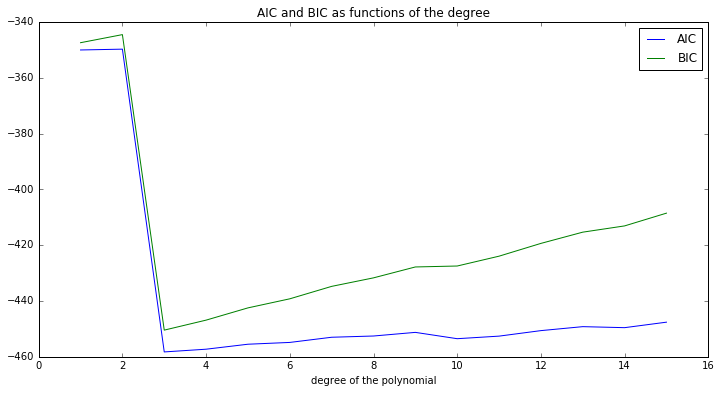

In [9]:
def compute_aic(n, rss, degree):
    return n * np.log(rss / n) + 2 * degree


def compute_bic(n, rss, degree):
    return n * np.log(rss / n) + np.log(n) * degree


def plot_aic_and_bic(ax, x, y, max_degree=15):
    n = len(x)
    aic_list = []
    bic_list = []
    degrees = range(1, max_degree + 1)
    for degree in degrees:
        coefs, intercept = polynomial_regression_fit(x, y, degree)
        r_sq, rss = evaluate_polynomial_regression_fit(coefs, intercept, x, y, degree)
        aic = compute_aic(n, rss, degree)
        aic_list.append(aic)
        bic = compute_bic(n, rss, degree)
        bic_list.append(bic)
        print 'degree: %2d, AIC: %.1f, BIC: %.1f' % (degree, aic, bic)

    min_aic = np.min(aic_list)
    min_aic_degree = aic_list.index(min_aic) + 1
    print 'min aic, degree: %d, value: %.5f' % (min_aic_degree, min_aic)

    min_bic = np.min(bic_list)
    min_bic_degree = bic_list.index(min_bic) + 1
    print 'min bic, degree: %d, value: %.5f' % (min_bic_degree, min_bic)

    ax.plot(degrees, aic_list, label='AIC')
    ax.plot(degrees, bic_list, label='BIC')
    ax.legend(loc='upper right')
    ax.set_xlabel('degree of the polynomial')
    ax.set_title('AIC and BIC as functions of the degree')


def compute_aic_and_bic(dataset_3_data):
    x, y = dataset_3_data

    _, ax = plt.subplots(1, 1, figsize=(12, 6))

    plot_aic_and_bic(ax, x, y)

    plt.show()

    
compute_aic_and_bic(dataset_3_data)

***Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?***

For both criteria the minimum is reached for degree = 3 (cubic polynomial). This result matches with the model that yields maximum test R^2 score (also degree = 3).

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

**Solution:**

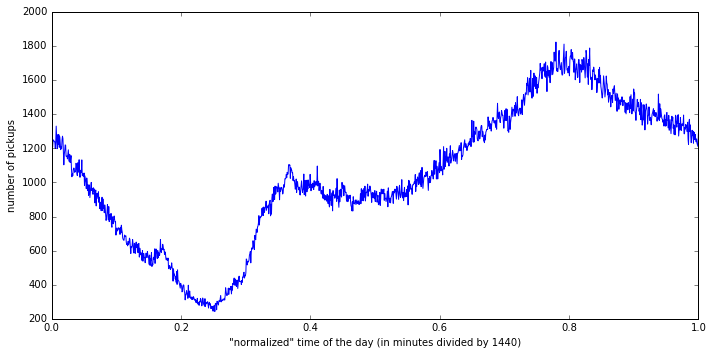

In [10]:
from collections import Counter


TaxicabData = namedtuple('TaxicabData', ['x', 'y'])

def normalize(xs):
    xs = np.array(xs, dtype=float)
    min_x = xs.min()
    max_x = xs.max()
    return [(x - min_x) / max_x for x in xs]


def get_taxicab_data(nrows=None):
    df = pd.read_csv('green_tripdata_2015-01.csv', header=0, index_col=False, usecols=['lpep_pickup_datetime'],
                     parse_dates=['lpep_pickup_datetime'], nrows=nrows)

    day_minute_list = []
    for _, row in df.iterrows():
        datetime = row[0]
        day_minute_list.append(datetime.minute + 60 * datetime.hour)

    counter = Counter(day_minute_list)
    xs, ys = zip(*counter.items())

    return TaxicabData(normalize(xs), ys)


def taxicab_plot_data(taxicab_data):
    xs, ys = taxicab_data

    _, ax = plt.subplots(1, 1, figsize=(10, 5))

    ax.plot(xs, ys)
    ax.set_xlabel('"normalized" time of the day (in minutes divided by 1440)')
    ax.set_ylabel('number of pickups')

    plt.tight_layout()
    plt.show()

    
taxicab_data = get_taxicab_data()
taxicab_plot_data(taxicab_data)

Let's have a look at the data. We have a complex-looking non-linear curve. Notice that we divided minutes by their maximum value (1440) so that all our x values were in [0, 1] range. We did it because otherwise there were problems with calculating high-degree coefficients in the polynomial regression (we had a drop in the train R^2 and no fit). We'll see later that the resulting coefficients are quite large.

degree:  1, train R^2: 0.57929, test R^2: 0.58048
degree:  2, train R^2: 0.62008, test R^2: 0.60843
degree:  3, train R^2: 0.87237, test R^2: 0.87512
degree:  4, train R^2: 0.87529, test R^2: 0.87854
degree:  5, train R^2: 0.89579, test R^2: 0.89787
degree:  6, train R^2: 0.89580, test R^2: 0.89778
degree:  7, train R^2: 0.94823, test R^2: 0.94848
degree:  8, train R^2: 0.94882, test R^2: 0.94947
degree:  9, train R^2: 0.96385, test R^2: 0.96796
degree: 10, train R^2: 0.96627, test R^2: 0.96971
degree: 11, train R^2: 0.96638, test R^2: 0.96967
degree: 12, train R^2: 0.97649, test R^2: 0.97704
degree: 13, train R^2: 0.97907, test R^2: 0.98053
degree: 14, train R^2: 0.98346, test R^2: 0.98536
degree: 15, train R^2: 0.98619, test R^2: 0.98759
degree: 16, train R^2: 0.98619, test R^2: 0.98759
degree: 17, train R^2: 0.98676, test R^2: 0.98762
degree: 18, train R^2: 0.98893, test R^2: 0.99030
degree: 19, train R^2: 0.98896, test R^2: 0.99050
degree: 20, train R^2: 0.98974, test R^2: 0.99127


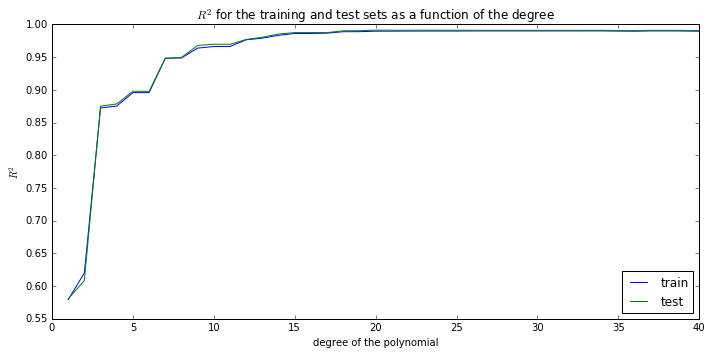

In [12]:
from sklearn.cross_validation import train_test_split


def taxicab_plot_r_sq(taxicab_data):
    xs, ys = taxicab_data

    np.random.seed(1090)

    _, ax = plt.subplots(1, 1, figsize=(10, 5))

    x_train, x_test, y_train, y_test = train_test_split(xs, ys, train_size=0.7)

    plot_r_sq(ax, x_train, x_test, y_train, y_test, max_degree=40)

    plt.tight_layout()
    plt.show()

    
taxicab_plot_r_sq(taxicab_data)

We split our dataset into the training (70%) and test (30%) sets. Then we do the same thing as we did in Problem 2b. For various degrees (1 to 40) we fit the training set and then evaluate the resulting fit on both training and test sets (using R^2 as a score function).

The maximum for the test R^2 is reached for degree = 20.

degree:  1, AIC: 15970.4, BIC: 15975.7
degree:  2, AIC: 15838.7, BIC: 15849.2
degree:  3, AIC: 14247.7, BIC: 14263.5
degree:  4, AIC: 14214.6, BIC: 14235.7
degree:  5, AIC: 13960.6, BIC: 13986.9
degree:  6, AIC: 13962.3, BIC: 13994.0
degree:  7, AIC: 12963.6, BIC: 13000.5
degree:  8, AIC: 12945.3, BIC: 12987.5
degree:  9, AIC: 12401.6, BIC: 12449.0
degree: 10, AIC: 12308.5, BIC: 12361.2
degree: 11, AIC: 12307.4, BIC: 12365.4
degree: 12, AIC: 11822.1, BIC: 11885.3
degree: 13, AIC: 11638.2, BIC: 11706.7
degree: 14, AIC: 11283.6, BIC: 11357.4
degree: 15, AIC: 11029.5, BIC: 11108.6
degree: 16, AIC: 11031.5, BIC: 11115.8
degree: 17, AIC: 10988.3, BIC: 11077.9
degree: 18, AIC: 10704.1, BIC: 10799.0
degree: 19, AIC: 10694.2, BIC: 10794.4
degree: 20, AIC: 10587.3, BIC: 10692.7
degree: 21, AIC: 10585.0, BIC: 10695.7
degree: 22, AIC: 10581.8, BIC: 10697.8
degree: 23, AIC: 10578.4, BIC: 10699.7
degree: 24, AIC: 10576.1, BIC: 10702.6
degree: 25, AIC: 10579.1, BIC: 10710.9
degree: 26, AIC: 10568.7,

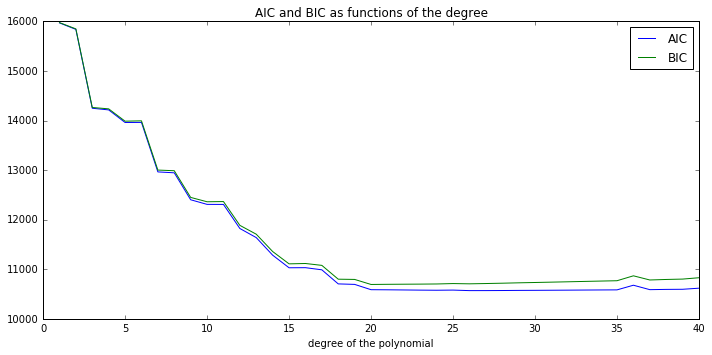

In [13]:
def taxicab_plot_aic_and_bic(taxicab_data):
    xs, ys = taxicab_data

    _, ax = plt.subplots(1, 1, figsize=(10, 5))

    plot_aic_and_bic(ax, xs, ys, max_degree=40)

    plt.tight_layout()
    plt.show()

    
taxicab_plot_aic_and_bic(taxicab_data)

Then we look at AIC and BIC scores for the same degrees ([1, 40]) using functions from Problem 3a.

AIC reached the minimum at degree 26. BIC - degree 20.

degree: 1, intercept: 527.3
coef 1: 1040.5
degree: 5, intercept: 1472.5
coef 1: -13153.2
coef 2: 61561.0
coef 3: -123323.6
coef 4: 121182.3
coef 5: -46646.5
degree: 10, intercept: 1388.2
coef 1: -19532.6
coef 2: 425470.4
coef 3: -5172627.3
coef 4: 31915400.9
coef 5: -109874466.2
coef 6: 225741335.1
coef 7: -283593897.9
coef 8: 213761179.4
coef 9: -88844691.2
coef 10: 15661709.2
degree: 20, intercept: 1219.5
coef 1: 8037.3
coef 2: -733188.7
coef 3: 11349277.5
coef 4: 217049098.3
coef 5: -11084115224.6
coef 6: 197130511360.8
coef 7: -2062440061495.6
coef 8: 14465690313007.3
coef 9: -72355032130524.4
coef 10: 267513336519930.9
coef 11: -747366466452341.1
coef 12: 1598061673578287.2
coef 13: -2629738144660094.5
coef 14: 3326020355991864.0
coef 15: -3205097879959869.0
coef 16: 2310748129054995.0
coef 17: -1206711365713412.8
coef 18: 431044618602078.7
coef 19: -94210363204305.1
coef 20: 9501614052554.4
degree: 40, intercept: 1224.7
coef 1: 15018.7
coef 2: -1878073.7
coef 3: 77550924.6
coef 4

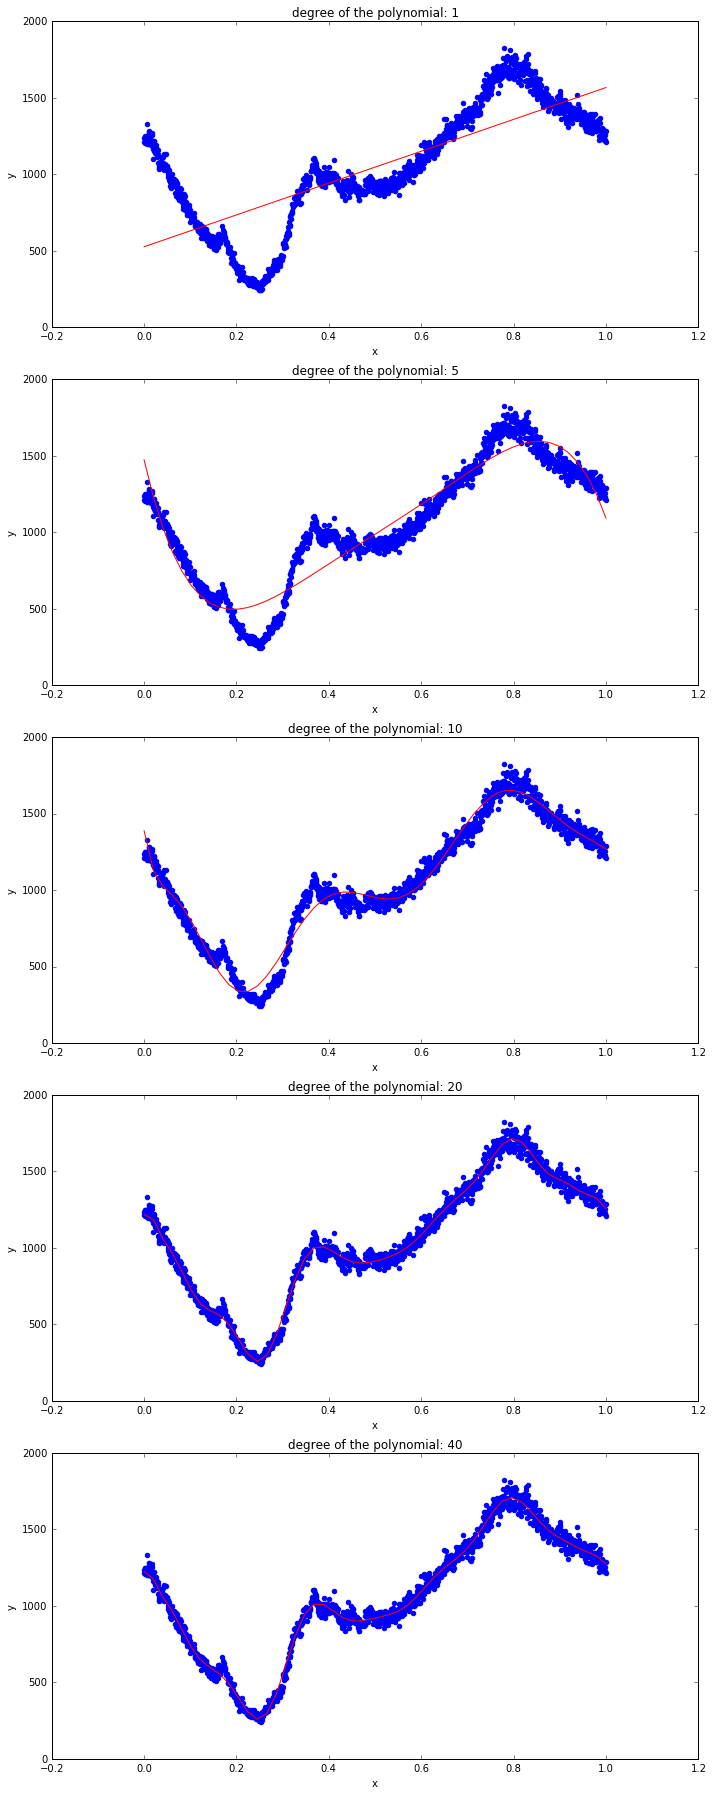

In [14]:
def taxicab_plot_fits(taxicab_data):
    xs, ys = taxicab_data

    degrees = [1, 5, 10, 20, 40]
    num_axes = len(degrees)
    _, axes = plt.subplots(num_axes, 1, figsize=(10, 5 * num_axes))

    lin_xs = np.linspace(0.0, 1.0)
    for degree, ax in izip(degrees, axes):
        coefs, intercept = polynomial_regression_fit(xs, ys, degree)
        print 'degree: %d, intercept: %.1f' % (degree, intercept)
        for ci, coef in enumerate(coefs, start=1):
            print 'coef %d: %.1f' % (ci, coef)

        ax.scatter(xs, ys, color='blue')
        ax.plot(lin_xs, polynomial_regression_predict(coefs, intercept, degree, lin_xs), color='red')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('degree of the polynomial: %d' % degree)

    plt.tight_layout()
    plt.show()

    
taxicab_plot_fits(taxicab_data)

So the best polynomial fit is the polynomial of degree 20. Let's have a look at fits for degrees: [1, 5, 10, 20, 40].

At degree = 20 we have a perfect fit. Degree 40 looks the same. Degree 20 is an obvious improvement over degree 10.

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

**Solution:**

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?

**Solution:**